In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton, bisect

# Actividad 04: Raices y ecuaciones de una variable

---
### Profesor: Juan Marcos Marín Ramírez
### Estudiante: Benjamín Escobar Jaramillo
#### Métodos Computacionales 2025-1
---

# 1

El método de **Regula Falsi** es una modificación al método de Bisección. Con base en los siguientes pasos, escriba una función que calcule la raiz de una función. Pruebe con $x^2 - 4 = 0$, y examine la convergencia en función de la tolerancia.


### Pasos

1. **Inicialización**:
   - Se parte de un intervalo $[a, b]$ donde $f(a)$ y $f(b)$ tienen signos opuestos.
   - Esto garantiza que hay al menos una raíz en el intervalo (por el teorema del valor intermedio).

2. **Cálculo del punto de intersección**:
   - En lugar de tomar el punto medio como en la bisección, se calcula un punto c usando la siguiente fórmula:
     
     $$c = \frac{a \cdot f(b) - b \cdot f(a)}{f(b) - f(a)}$$

   - Esta fórmula representa la intersección de la línea que conecta los puntos $(a, f(a))$ y $(b, f(b))$ con el eje $x$.

3. **Evaluación y actualización del intervalo**:
   - Se evalúa $f(c)$.
   - Si $f(c) = 0$ (o es menor que una tolerancia establecida), $c$ es la raíz buscada.
   - Si $f(c)$ tiene el mismo signo que $f(a)$, se actualiza $a = c$.
   - Si $f(c)$ tiene el mismo signo que $f(b)$, se actualiza $b = c$.

4. **Iteración**:
   - Se repiten los pasos 2 y 3 hasta que se cumpla un criterio de parada (por ejemplo, $|f(c)| < tolerancia$ o se alcance un número máximo de iteraciones).

In [194]:
def rg(f,a,b,tol,maxiter):
  '''
  Permite encontrar las raices de una función.
  f: La función
  a: comienzo del intervalo a evaluar
  b: fin del intervalo a evaluar
  tol: tolerancia
  maxiter: máximas iteraciones
  '''

  if f(a)*f(b)>0:
    raise ValueError("f(a) y f(b) DEBEN tener signos opuestos") #No permite estas cosas!

  for i in range (maxiter):
    fa=f(a)
    fb=f(b)

    c=(((a*fb)-(b*fa))/(fb-fa))
    if abs(f(c))<tol:           #Devuelve en la tolerancia
      return c
    if f(c)*f(a)>0:
      a=c
      continue                   # En caso contrario, actualzia como mencioando
    if f(c)*f(b)>0:
      b=c
      continue
  return print(f"maximas iteraciones alcanzadas, el valor podría estar al rededor de {c}")  #Y si no alcanza las iteraciones, lo informa

In [195]:
f=lambda x: x**2-4
rg(f,-3,1,1e-15,100)

-2.0

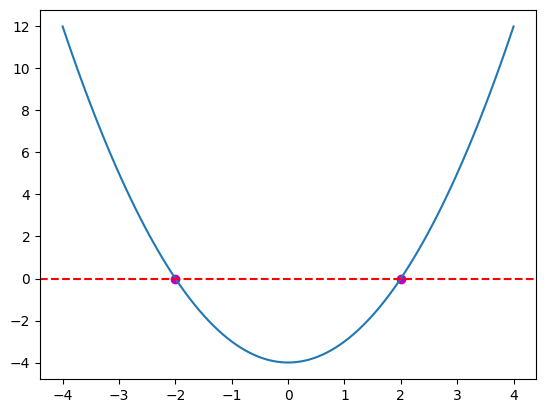

In [196]:
x=np.linspace(-4,4,100)
y=f(x)                                     #Comprobemos nuestro metodo!
plt.plot(x,y)
plt.axhline(0,linestyle="--",color="r")
plt.scatter(rg(f,1,2,1e-15,100),f(rg(f,1,2,1e-15,100)),color="m")
plt.scatter(rg(f,-3,1,1e-15,100),f(rg(f,-3,0,1e-15,100)),color="m")      #Eureka! Funciona!

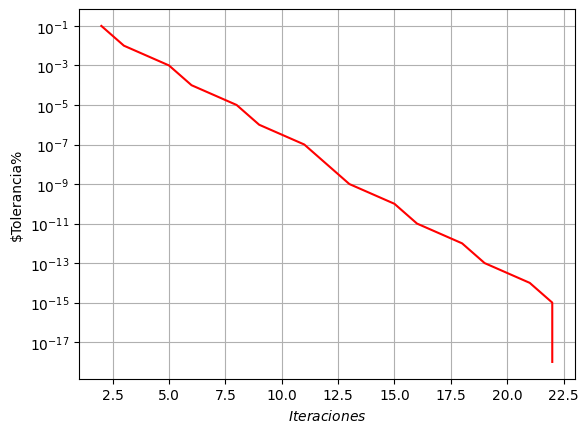

In [197]:
## Ahora, por simplicidad, hagamos una función análoga, que devuelva las iteraciones, y poder comapara su convergencia
#En funcion de la tolerancia!

def rgi(f,a,b,tol,maxiter=200):  #Estandar de iteraciones
  '''
  Devuelve el número de iteraciones que tarda la función en encontrar las raices, con una tolerancia proporcionada.
  f: La función
  a: comienzo del intervalo a evaluar
  b: fin del intervalo a evaluar
  tol: tolerancia
  maxiter: máximas iteraciones
  '''

  if f(a)*f(b)>0:
    raise ValueError("f(a) y f(b) DEBEN tener signos opuestos") #No permite estas cosas!

  for i in range (maxiter):
    fa=f(a)
    fb=f(b)

    c=(((a*fb)-(b*fa))/(fb-fa))
    if abs(f(c))<tol:           #Devuelve en la tolerancia
      return i
    if f(c)*f(a)>0:
      a=c
      continue                   # En caso contrario, actualzia como mencioando
    if f(c)*f(b)>0:
      b=c
      continue
  return print(f"maximas iteraciones alcanzadas, el valor podría estar al rededor de {c}")  #Y si no alcanza las iteraciones, lo informa


tolerancia = np.logspace(-1, -18, 18)  #Clasico forma de expresar
ejex=[]

for j in tolerancia:
  ejex.append(rgi(f,1,3,j))


plt.plot(ejex,tolerancia,color="r")
plt.yscale("log")
plt.xlabel("$Iteraciones$")
plt.ylabel("$Tolerancia%")
plt.grid()    #Como podemos observar, parece seguir, cuanto menos en este caso, una tendencia lineal!

# 2

Una carga total $Q$ se distribuye uniformemente alrededor de un conductor en forma de anillo de radio $a$. Una carga $q$ se encuentra a una distancia $x$ horizontalmente a través del centro del anillo. La fuerza ejercida sobre la carga por el anillo está dada por:

$$F = \frac{1}{4\piϵ_0}\frac{qQx}{(x^2+a^2)^{3/2}}$$

con $q$ y $Q$ de $2\times 10^{-5}$C.

  * Escriba una función donde ingresen los valores de $a$ y $x$ para hallar la fuerza.
  * Haga un gráfico de $F(x)$ para un anillo de radio $a= 0.85$m para $0.1\leq x\leq 2.0$m
  * Usando el método de Newton-Raphson y otro diferente, para encontrar el valor de $x$ en el cual la fuerza será equivalente a 1.25 N.
  * Encuentre qué sucede si disminuimos el radio con respecto a la fuerza que experimentará la carga $q$.

In [198]:
q=2*1e-5       #Definamos nuestros datos
Q=2*1e-5
E0=8.854187817*1e-12

def F(a,x,q=q,Q=Q):  #Tenemos ya definidios a q y Q, pero demos la opción de intercambio para que sea mas general!

  '''
  Al ingresar las variables, proporciona la fuerza que ejerce el campo de un anillo de radio a,
  y carga Q, a una distancia horizontal x de una carga q. (devuelve la fuerza en N)

  a= Radio del anillo
  x= Distancia horizontal
  q(opcional)= Carga sobre la cual se ejerce la fuerza
  Q(opcional)= Carga del aniilo
  '''

  return (1/(4*np.pi*E0))*((q*Q*x)/(((x**2)+(a**2))**(3/2)))

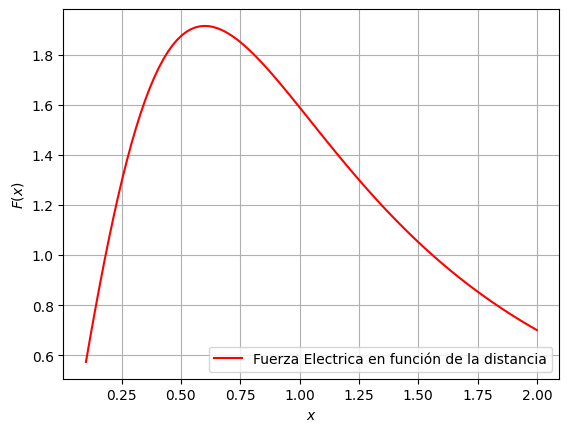

In [199]:
#Ahora grafiquemos!! Será realmente interesante ver el comportamiento de la fuerza a medida que se desplaza!
ejex=np.linspace(0.1,2,100)
ejey=F(0.85,ejex)
plt.plot(ejex,ejey,color="r",label="Fuerza Electrica en función de la distancia")
plt.xlabel("$x$")
plt.ylabel("$F(x)$")
plt.grid()
plt.legend() #Que interesante! crece en un par de metros, pero posteriormente decrece!(Se esperaba lo último, no lo primero)

In [200]:
#Bueno; según nuestra grafica, la fuerza será equivalente a 1.25N en una distancia al rededor de... 0.25m.
#Empleemos Newton para confirmar nuestras sospechas y obtene un valor preciso
#A) Obtener una función tipo f(x)=0
a=0.85

def F_0(x,a=a,q=q,Q=Q):  #tambien vamos a tener como estandar a "a", y todo lo demas, igual, excepto...

  return (1/(4*np.pi*E0))*((q*Q*x)/(((x**2)+(a**2))**(3/2)))-(1.25) #aqui! voila nuestra f(x)=0

X=newton(F_0,0.24)
print(X)        #Ayyy!! estuvimos cerca, no?, confirmemos...!! (Gràficamente)

0.2394492550914678


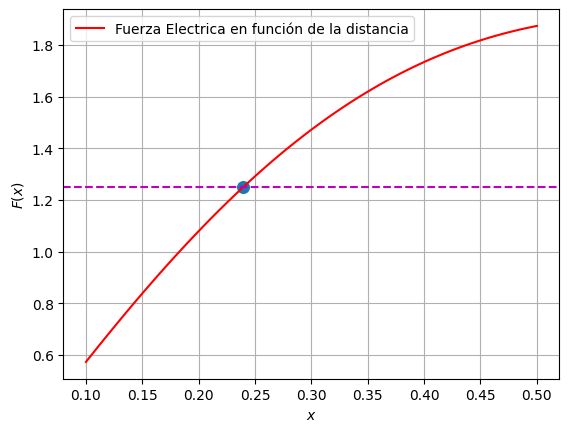

In [201]:
ejex=np.linspace(0.1,0.5,100)
ejey=F(0.85,ejex)
plt.plot(ejex,ejey,color="r",label="Fuerza Electrica en función de la distancia")
plt.xlabel("$x$")
plt.ylabel("$F(x)$")
plt.scatter(X,F(0.85,X),s=70)
plt.axhline(1.25,linestyle="--",color="m")
plt.grid()
plt.legend() #Efectivamente! Ahi esta nuestro valor.

In [204]:
#Y ahora, empleando otro metodo, ya que tenemos la ayuda visual, empleemos bisección.
Xb=bisect(F_0,0.20,0.30)
print(f"Por Newton, obtenemos x={round(X,5)}, y por Bisección x={round(Xb,5)}")

Por Newton, obtenemos x=0.23945, y por Bisección x=0.23945


Text(0.5, 0, '$a(m)$')

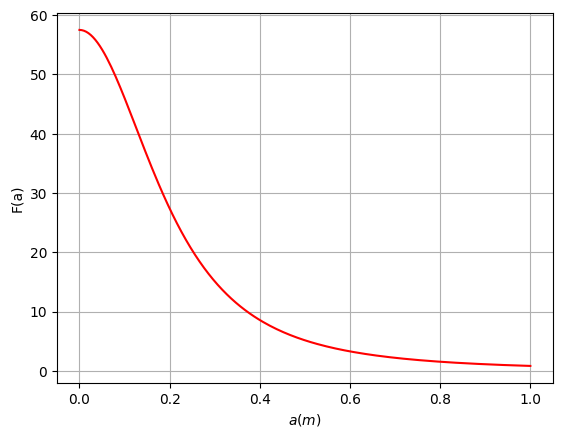

In [205]:
'''
Ahora tenemos una pregunta bastante curiosa! Pongamos nuestra particula a una distancia x estandar.
¿Què ocurrirá con la fuerza a medida que el radio se va haciendo cada vez mas... pequeño?
Algo mas explicito que los datos númericos son... las graficas! Veamos entonces.'''

#Estandaricemos la distancia
x1=0.25   #Al rededor de este punto, como vimos anteriormente la fuerza es máxima con las condiciones anteriores, veamos que ocurre!

a=np.linspace(1,1e-18,200)  #Vamos de 1m a practicamente un punto! Cuanto interés!!
#(Note que en la ecuación, si a=0, obtenemos la expresión de la fuerza para una particula puntual!)

Y=F(a,x1)  #x es constante, esta variando a.

plt.plot(a,Y,color="r")
plt.grid()
plt.ylabel("F(a)")
plt.xlabel("$a(m)$")

In [ ]:
'''
Y tal como sospechabamos por el algebra proporcionada por la ecuación, al disminuir el radio, hacemos cada vez mas pequeño
el denominador de la expresión, lo cual aumenta la fuerza. Note el pequeño cambio de concavidad en x≈0; esto se debe a que,
en este punto, tenemos praticamente una carga puntual! por lo cual... la fuerza es... Máxima? Que interesante...!
Esto tiene especial sentido pues la carga del anillo (Q), siempre se conserva; al ya no estar distribuida en el espacio, generando
contribuciones sobre la carga q, sino que esta toda concentrada en un unico punto, es consecuente que la fuerza sea mayor.
'''

# 3

La velocidad ascendente $v$ de un cohete se puede calcular mediante
$$v = u\ln \frac{m_0}{m_0 - qt} - gt$$

donde $u$ es la velocidad a la que se expulsa el combustible, $m_0$ la masa inicial del cohete en $t = 0$, $q$ la razón de consumo del combustible y $g = 9.81$ m/s$^2$.

* Escriba una función para $v$ con las variables asociadas.
* Sea $m_0 = 1.6\times 10^5$ kg, $u = 1800$ m/s y $q = 2600$ kg/s realice un grafico de $v(t)$ para $0\leq t\leq 100$ s.
* Encuentre el valor de tiempo para el cual $v = 750$ m/s usando el método de Newton-Raphson, Bisección y el de Regula-Falsi
* Varie los valores de $u$ (utilice por lo menos 20) y encuentre los tiempos para los cuales el cohete alcanzará la velocidad de 750 m/s. Qué conclusiones puede sacar?



In [206]:
## Calculemos la velocidad ascendente de un rocket!!!

def v(u,m0,q,t,g=9.81):    #Permitamos opcionalmente cambiar g. No sea que estemos en la Luna, y nuestros calculos cambien!
  '''
  Calcula velocidad ascendente v de un cohete.

  u= Velocidad a la que se expulsa el combtusible (m/s)
  m0= Masa inicial del cohete (en t=0) (kg)
  q= La razón de consumo del combustible (kg/s)
  g(opt)= gravedad del planeta a escapar (Estandar Tierra, g=9.81)(m/s)
  '''
  return u*np.log((m0)/(m0-(q*t)))-(g*t)  #Y voilà! La función asociada.

<ipython-input-206-fdde2d324745>:12: RuntimeWarning: invalid value encountered in log
  return u*np.log((m0)/(m0-(q*t)))-(g*t)  #Y voilà! La función asociada.


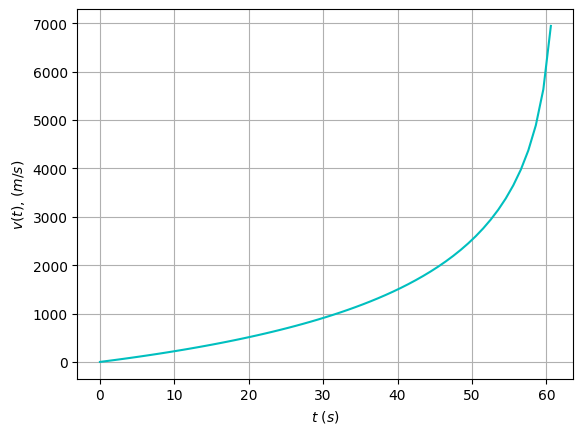

In [208]:
#Definamos ahora variables y observemos la velocidad!
#Sospechamos que, entre màs tiempo, mayor velocidad (Pues el tanque se irà vaciando!)

m0=1.6*1e5
u=1800
q=2600
t=np.linspace(0,100,100)
y=v(u,m0,q,t)
plt.plot(t,y,color="c")
plt.xlabel("$t$ $(s)$")
plt.ylabel("$v(t)$, $(m/s)$")
plt.grid()

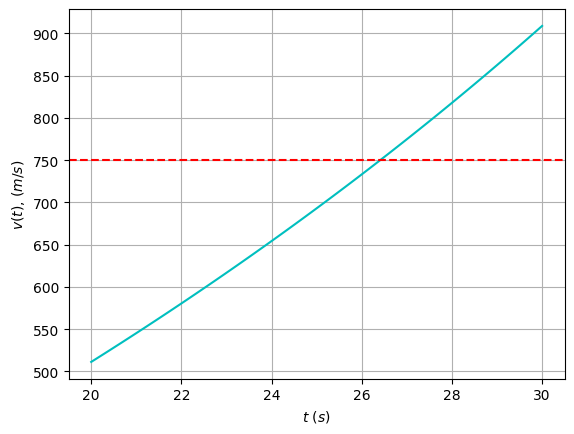

In [210]:
'''
Ah-Ha! Note que tanto python, como la gráfica, nos presenta un ligero error, muy consecuente!! Nuestra ecuación,
algrebraicamente deja de tener sentido en t>60 (aprx), pues a partir de ese punto, tenemos un denominador =0! Y de hecho,
si seguimos aumentando, tendríamos un argumento negativo en un logartimo! No es posible continuar a partir de ese punto, por lo cual,
la gràfica se detiene en el tiempo màximo algebraicamente posible.
'''
#Ahora, hallemos cuando la velocidad=750m/s!, Plan? Hacer una función de la forma f(x)=0

def v_0(t,u=1800,m0=1.6*1e5,q=2600,g=9.81):    #Ahora, solo preguntaremos por t!          #Pero todo queda igual, excepto....
  return (u*np.log((m0)/(m0-(q*t)))-(g*t))-750  #Aqui!

#Ahora, para calcular, solemos requerrir intervalos! asi que, empleemos una ayuda visual...
m0=1.6*1e5
u=1800
q=2600
t=np.linspace(20,30,100)
y=v(u,m0,q,t)
plt.plot(t,y,color="c")
plt.xlabel("$t$ $(s)$")
plt.ylabel("$v(t)$, $(m/s)$")
plt.axhline(750,linestyle="--",color="r")
plt.grid()        #Como podemos ver, nuestra raiz deseada esta entre t(26,28)! Asi que, con esta informacion, calculemos!

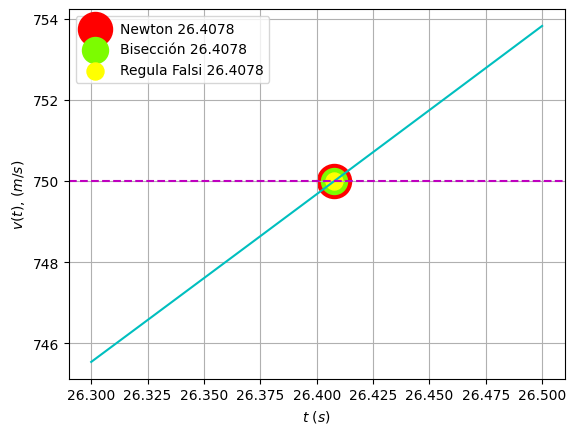

In [131]:
t_newt=newton(v_0,25)
t_bisec=bisect(v_0,26,28)
t_falsi=rg(v_0,26,26.5,1e-12,100)          #Y confirmemos...!

m0=1.6*1e5
u=1800
q=2600
t=np.linspace(26.3,26.50,100)
y=v(u,m0,q,t)
plt.plot(t,y,color="c")
plt.xlabel("$t$ $(s)$")
plt.ylabel("$v(t)$, $(m/s)$")
plt.scatter(t_newt,v(u,m0,q,t_newt),s=600,color="r",label=f"Newton {round(t_newt,4)}")
plt.scatter(t_bisec,v(u,m0,q,t_bisec),s=350,color="lawngreen",label=f"Bisección {round(t_bisec,4)}")
plt.scatter(t_falsi,v(u,m0,q,t_falsi),s=150,color="yellow",label=f"Regula Falsi {round(t_falsi,4)}")
plt.axhline(750,color="m",linestyle="--")
plt.grid()
plt.legend()

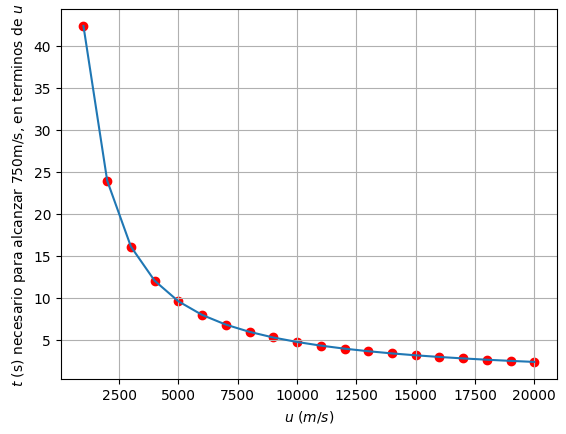

In [212]:
#Perfecto! Ahora, variemos los valores de u, con el objetivo de ver cuanto tarda el cohete en alcanzar los 750m/s.
'''Como u representa la velocidad a la que expulsa el combustible... Al aumentar u... llegarà mas pronto a 750?'''
u = np.linspace(1000, 20000, 20) #Que vaya desde 1000m/s hasta 20.000 m/s!!
ejeh=[] #Aqui almacenaremos nuestros proximos resultados

for i in u:
  def v_0(t,u=i,m0=1.6*1e5,q=2600,g=9.81):    #Aqui vamos a variar u!
    return (u*np.log((m0)/(m0-(q*t)))-(g*t))-750
  ejeh.append(newton(v_0,20)) #Un t aproximado... estandar! unos 20s.
  plt.scatter(i,newton(v_0,20),color="r")

plt.plot(u,ejeh)
plt.xlabel("$u$ ($m/s$)")
plt.ylabel("$t$ (s) necesario para alcanzar 750m/s, en terminos de $u$")
plt.grid()


In [ ]:
'''
Nuestras sospechas, han sido confirmadas.
Logicamente, por las relaciones algebraicas, no tendriamos un comportamiento lineal, sin embargo, desde un punto de vista
conceptual, el tiempo con el que alcanza los 750m/s debe ser reducido, a medida que aumentamos la velocidad con la que
expulsamos el combustible! Lo que evidencia nuestra gráfica.
'''